In [21]:
import pandas as pd
import numpy as np

In [22]:
# read csv "OMDb_results.csv" into a dataframe
df = pd.read_csv("OMDb_results.csv")
# show the dataframe with all columns visible
pd.set_option('display.max_columns', None)
df['Ratings'][3]

"[{'Source': 'Internet Movie Database', 'Value': '8.6/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '96/100'}]"

In [23]:
# reset the index of df
df = df.reset_index(drop=True)
df.head(15)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error,totalSeasons
0,Mulholland Drive,2001.0,R,19 Oct 2001,147 min,"Drama, Mystery, Thriller",David Lynch,David Lynch,"Naomi Watts, Laura Harring, Justin Theroux",After a car wreck on the winding Mulholland Dr...,"English, Spanish, French","France, United States",Nominated for 1 Oscar. 49 wins & 61 nomination...,https://m.media-amazon.com/images/M/MV5BYTRiMz...,"[{'Source': 'Internet Movie Database', 'Value'...",86.0,7.9,"380,460",tt0166924,movie,18 Oct 2016,"$7,220,243",NaN,NaN,True,NaN,NaN
1,In the Mood for Love,2000.0,PG,09 Mar 2001,98 min,"Drama, Romance",Kar-Wai Wong,Kar-Wai Wong,"Tony Leung Chiu-wai, Maggie Cheung, Siu Ping-Lam",Two neighbors form a strong bond after both su...,"Cantonese, Shanghainese, French, Spanish","Hong Kong, France",Nominated for 1 BAFTA Award44 wins & 50 nomina...,https://m.media-amazon.com/images/M/MV5BYWVjNj...,"[{'Source': 'Internet Movie Database', 'Value'...",87.0,8.1,"164,987",tt0118694,movie,15 Oct 2020,"$2,738,980",NaN,NaN,True,NaN,NaN
2,There Will Be Blood,2007.0,R,25 Jan 2008,158 min,Drama,Paul Thomas Anderson,"Paul Thomas Anderson, Upton Sinclair","Daniel Day-Lewis, Paul Dano, Ciarán Hinds","A story of family, religion, hatred, oil and m...","English, American Sign",United States,Won 2 Oscars. 114 wins & 138 nominations total,https://m.media-amazon.com/images/M/MV5BMjAxOD...,"[{'Source': 'Internet Movie Database', 'Value'...",93.0,8.2,"635,381",tt0469494,movie,24 Feb 2012,"$40,222,514",NaN,NaN,True,NaN,NaN
3,Spirited Away,2001.0,PG,28 Mar 2003,125 min,"Animation, Adventure, Family",Hayao Miyazaki,Hayao Miyazaki,"Daveigh Chase, Suzanne Pleshette, Miyu Irino","During her family's move to the suburbs, a sul...",Japanese,Japan,Won 1 Oscar. 58 wins & 31 nominations total,https://m.media-amazon.com/images/M/MV5BMjlmZm...,"[{'Source': 'Internet Movie Database', 'Value'...",96.0,8.6,"835,536",tt0245429,movie,19 Dec 2019,"$15,205,725",NaN,NaN,True,NaN,NaN
4,Boyhood,2014.0,R,15 Aug 2014,165 min,Drama,Richard Linklater,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke","The life of Mason, from early childhood to his...","English, Spanish, Ukrainian, Arabic",United States,Won 1 Oscar. 175 wins & 218 nominations total,https://m.media-amazon.com/images/M/MV5BMTYzND...,"[{'Source': 'Internet Movie Database', 'Value'...",100.0,7.9,"365,562",tt1065073,movie,07 Jan 2016,"$25,352,281",NaN,NaN,True,NaN,NaN
5,Eternal Sunshine of the Spotless Mind,2004.0,R,19 Mar 2004,108 min,"Drama, Romance, Sci-Fi",Michel Gondry,"Charlie Kaufman, Michel Gondry, Pierre Bismuth","Jim Carrey, Kate Winslet, Tom Wilkinson","When their relationship turns sour, a couple u...",English,United States,Won 1 Oscar. 73 wins & 111 nominations total,https://m.media-amazon.com/images/M/MV5BMTY4Nz...,"[{'Source': 'Internet Movie Database', 'Value'...",89.0,8.3,"1,069,858",tt0338013,movie,12 Feb 2014,"$34,400,301",NaN,NaN,True,NaN,NaN
6,The Tree of Life,2011.0,PG-13,17 May 2011,139 min,"Drama, Fantasy",Terrence Malick,Terrence Malick,"Brad Pitt, Sean Penn, Jessica Chastain","The story of a family in Waco, Texas in 1956. ...",English,United States,Nominated for 3 Oscars. 116 wins & 129 nominat...,https://m.media-amazon.com/images/M/MV5BMTMwNj...,"[{'Source': 'Internet Movie Database', 'Value'...",85.0,6.8,"183,095",tt0478304,movie,25 Nov 2015,"$13,303,319",NaN,NaN,True,NaN,NaN
7,Yi Yi,2000.0,Not Rated,16 Dec 2000,173 min,"Drama, Romance",Edward Yang,Edward Yang,"Nien-Jen Wu, Elaine Jin, Issei Ogata",Each member of a middle-class Taipei family se...,"Mandarin, Min Nan, Hokkien, English, Japanese,...","Taiwan, Japan",13 wins & 23 nominations,https://m.media-amazon.com/images/M/MV5BZDNkMG...,"[{'Source': 'Internet Movie Database', 'Value'...",94.0,8.1,"27,872",tt0244316,movie,12 Jun 2007,"$1,136,776",NaN,NaN,True,NaN,NaN
8,A Separation,20

In [24]:
import pandas as pd
import ast

def extract_ratings(rating_string):
    try:
        ratings_list = ast.literal_eval(rating_string)
        ratings_dict = {rating['Source']: rating['Value'] for rating in ratings_list}
        return ratings_dict
    except ValueError:
        return {}

ratings_dicts = df['Ratings'].apply(extract_ratings)

ratings_df = pd.json_normalize(ratings_dicts)
df_joined = df.join(ratings_df)

pd.set_option('display.max_columns', None)

df_joined.head(15)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,Error,totalSeasons,Internet Movie Database,Rotten Tomatoes,Metacritic
0,Mulholland Drive,2001.0,R,19 Oct 2001,147 min,"Drama, Mystery, Thriller",David Lynch,David Lynch,"Naomi Watts, Laura Harring, Justin Theroux",After a car wreck on the winding Mulholland Dr...,"English, Spanish, French","France, United States",Nominated for 1 Oscar. 49 wins & 61 nomination...,https://m.media-amazon.com/images/M/MV5BYTRiMz...,"[{'Source': 'Internet Movie Database', 'Value'...",86.0,7.9,"380,460",tt0166924,movie,18 Oct 2016,"$7,220,243",NaN,NaN,True,NaN,NaN,7.9/10,84%,86/100
1,In the Mood for Love,2000.0,PG,09 Mar 2001,98 min,"Drama, Romance",Kar-Wai Wong,Kar-Wai Wong,"Tony Leung Chiu-wai, Maggie Cheung, Siu Ping-Lam",Two neighbors form a strong bond after both su...,"Cantonese, Shanghainese, French, Spanish","Hong Kong, France",Nominated for 1 BAFTA Award44 wins & 50 nomina...,https://m.media-amazon.com/images/M/MV5BYWVjNj...,"[{'Source': 'Internet Movie Database', 'Value'...",87.0,8.1,"164,987",tt0118694,movie,15 Oct 2020,"$2,738,980",NaN,NaN,True,NaN,NaN,8.1/10,92%,87/100
2,There Will Be Blood,2007.0,R,25 Jan 2008,158 min,Drama,Paul Thomas Anderson,"Paul Thomas Anderson, Upton Sinclair","Daniel Day-Lewis, Paul Dano, Ciarán Hinds","A story of family, religion, hatred, oil and m...","English, American Sign",United States,Won 2 Oscars. 114 wins & 138 nominations total,https://m.media-amazon.com/images/M/MV5BMjAxOD...,"[{'Source': 'Internet Movie Database', 'Value'...",93.0,8.2,"635,381",tt0469494,movie,24 Feb 2012,"$40,222,514",NaN,NaN,True,NaN,NaN,8.2/10,91%,93/100
3,Spirited Away,2001.0,PG,28 Mar 2003,125 min,"Animation, Adventure, Family",Hayao Miyazaki,Hayao Miyazaki,"Daveigh Chase, Suzanne Pleshette, Miyu Irino","During her family's move to the suburbs, a sul...",Japanese,Japan,Won 1 Oscar. 58 wins & 31 nominations total,https://m.media-amazon.com/images/M/MV5BMjlmZm...,"[{'Source': 'Internet Movie Database', 'Value'...",96.0,8.6,"835,536",tt0245429,movie,19 Dec 2019,"$15,205,725",NaN,NaN,True,NaN,NaN,8.6/10,96%,96/100
4,Boyhood,2014.0,R,15 Aug 2014,165 min,Drama,Richard Linklater,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke","The life of Mason, from early childhood to his...","English, Spanish, Ukrainian, Arabic",United States,Won 1 Oscar. 175 wins & 218 nominations total,https://m.media-amazon.com/images/M/MV5BMTYzND...,"[{'Source': 'Internet Movie Database', 'Value'...",100.0,7.9,"365,562",tt1065073,movie,07 Jan 2016,"$25,352,281",NaN,NaN,True,NaN,NaN,7.9/10,97%,100/100
5,Eternal Sunshine of the Spotless Mind,2004.0,R,19 Mar 2004,108 min,"Drama, Romance, Sci-Fi",Michel Gondry,"Charlie Kaufman, Michel Gondry, Pierre Bismuth","Jim Carrey, Kate Winslet, Tom Wilkinson","When their relationship turns sour, a couple u...",English,United States,Won 1 Oscar. 73 wins & 111 nominations total,https://m.media-amazon.com/images/M/MV5BMTY4Nz...,"[{'Source': 'Internet Movie Database', 'Value'...",89.0,8.3,"1,069,858",tt0338013,movie,12 Feb 2014,"$34,400,301",NaN,NaN,True,NaN,NaN,8.3/10,92%,89/100
6,The Tree of Life,2011.0,PG-13,17 May 2011,139 min,"Drama, Fantasy",Terrence Malick,Terrence Malick,"Brad Pitt, Sean Penn, Jessica Chastain","The story of a family in Waco, Texas in 1956. ...",English,United States,Nominated for 3 Oscars. 116 wins & 129 nominat...,https://m.media-amazon.com/images/M/MV5BMTMwNj...,"[{'Source': 'Internet Movie Database', 'Value'...",85.0,6.8,"183,095",tt0478304,movie,25 Nov 2015,"$13,303,319",NaN,NaN,True,NaN,NaN,6.8/10,85%,85/100
7,Yi Yi,2000.0,Not Rated,16 Dec 2000,173 min,"Drama, Romance",Edward Yang,Edward Yang,"Nien-Jen Wu, Elaine Jin, Issei Ogata",Each member of a middle-class Taipei family se...,"Mandarin, Min Nan, Hokkien, English, Japanese,...","Taiwan, Japan",13 wins & 23 nominations,https://m.media-amazo

In [25]:
# Turn the "Internet Movie Database" column into a float. e.g. "8.8/10" should be 8.8
df_joined['Internet Movie Database'] = df_joined['Internet Movie Database'].str.extract(r'(\d+\.\d+)').astype(float)


In [26]:
# Turn the "Rotten Tomatoes" column into a float. e.g. "95%" should be 95
df_joined['Rotten Tomatoes'] = df_joined['Rotten Tomatoes'].str.extract(r'(\d+)').astype(float)

In [27]:
# Turn the "Metacritic" column into a float. e.g. "96/100" should be 96
df_joined['Metacritic'] = df_joined['Metacritic'].str.extract(r'(\d+)').astype(float)

In [28]:
# Turn the "BoxOffice" column into a float. e.g. "$1,000,000" should be "1000000"
# Get rid of the dollar sign and commas first
df_joined['BoxOffice'] = df_joined['BoxOffice'].str.replace(r'[\$,]', '', regex=True).astype(float)


In [29]:
# Turn "Runtime" into float. e.g. "123 min" should be 123
# Get rid of the "min" first
df_joined['Runtime'] = df_joined['Runtime'].str.extract(r'(\d+)').astype(float)

In [30]:
# add a coloumn "Oscar Nominations" and parse the number from "Awards". e.g. Nominated for 1 Oscar. 49 wins & 61 nomination, should be 1 in float type
df_joined['Oscar Nominations'] = df_joined['Awards'].str.extract(r'Nominated for (\d+) Oscar').astype(float)
# fill NaN with 0
df_joined['Oscar Nominations'] = df_joined['Oscar Nominations'].fillna(0)

In [31]:
# add a column "Wins", and parse the number from "Awards". e.g. Nominated for 1 Oscar. 49 wins & 61 nomination, should be 49 in float type
df_joined['Wins'] = df_joined['Awards'].str.extract(r'(\d+) wins').astype(float)
# fill NaN with 0
df_joined['Wins'] = df_joined['Wins'].fillna(0)

In [32]:
# add a column "Nominations", and parse the number from "Awards". e.g. Nominated for 1 Oscar. 49 wins & 61 nomination, should be 61 in float type
df_joined['Nominations'] = df_joined['Awards'].str.extract(r'(\d+) nominations').astype(float)
# fill NaN with 0
df_joined['Nominations'] = df_joined['Nominations'].fillna(0)

In [33]:
# drop the "Ratings" column
df_joined = df_joined.drop(columns=['Ratings'])

In [34]:
# drop these coloumns: Production	Website	Response	Error	totalSeasons
df_joined = df_joined.drop(columns=['Production', 'Website', 'Response', 'Error', 'totalSeasons'])

In [35]:
df_joined.head(18)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Internet Movie Database,Rotten Tomatoes,Metacritic,Oscar Nominations,Wins,Nominations
0,Mulholland Drive,2001.0,R,19 Oct 2001,147.0,"Drama, Mystery, Thriller",David Lynch,David Lynch,"Naomi Watts, Laura Harring, Justin Theroux",After a car wreck on the winding Mulholland Dr...,"English, Spanish, French","France, United States",Nominated for 1 Oscar. 49 wins & 61 nomination...,https://m.media-amazon.com/images/M/MV5BYTRiMz...,86.0,7.9,"380,460",tt0166924,movie,18 Oct 2016,7220243.0,7.9,84.0,86.0,1.0,49.0,61.0
1,In the Mood for Love,2000.0,PG,09 Mar 2001,98.0,"Drama, Romance",Kar-Wai Wong,Kar-Wai Wong,"Tony Leung Chiu-wai, Maggie Cheung, Siu Ping-Lam",Two neighbors form a strong bond after both su...,"Cantonese, Shanghainese, French, Spanish","Hong Kong, France",Nominated for 1 BAFTA Award44 wins & 50 nomina...,https://m.media-amazon.com/images/M/MV5BYWVjNj...,87.0,8.1,"164,987",tt0118694,movie,15 Oct 2020,2738980.0,8.1,92.0,87.0,0.0,44.0,50.0
2,There Will Be Blood,2007.0,R,25 Jan 2008,158.0,Drama,Paul Thomas Anderson,"Paul Thomas Anderson, Upton Sinclair","Daniel Day-Lewis, Paul Dano, Ciarán Hinds","A story of family, religion, hatred, oil and m...","English, American Sign",United States,Won 2 Oscars. 114 wins & 138 nominations total,https://m.media-amazon.com/images/M/MV5BMjAxOD...,93.0,8.2,"635,381",tt0469494,movie,24 Feb 2012,40222514.0,8.2,91.0,93.0,0.0,114.0,138.0
3,Spirited Away,2001.0,PG,28 Mar 2003,125.0,"Animation, Adventure, Family",Hayao Miyazaki,Hayao Miyazaki,"Daveigh Chase, Suzanne Pleshette, Miyu Irino","During her family's move to the suburbs, a sul...",Japanese,Japan,Won 1 Oscar. 58 wins & 31 nominations total,https://m.media-amazon.com/images/M/MV5BMjlmZm...,96.0,8.6,"835,536",tt0245429,movie,19 Dec 2019,15205725.0,8.6,96.0,96.0,0.0,58.0,31.0
4,Boyhood,2014.0,R,15 Aug 2014,165.0,Drama,Richard Linklater,Richard Linklater,"Ellar Coltrane, Patricia Arquette, Ethan Hawke","The life of Mason, from early childhood to his...","English, Spanish, Ukrainian, Arabic",United States,Won 1 Oscar. 175 wins & 218 nominations total,https://m.media-amazon.com/images/M/MV5BMTYzND...,100.0,7.9,"365,562",tt1065073,movie,07 Jan 2016,25352281.0,7.9,97.0,100.0,0.0,175.0,218.0
5,Eternal Sunshine of the Spotless Mind,2004.0,R,19 Mar 2004,108.0,"Drama, Romance, Sci-Fi",Michel Gondry,"Charlie Kaufman, Michel Gondry, Pierre Bismuth","Jim Carrey, Kate Winslet, Tom Wilkinson","When their relationship turns sour, a couple u...",English,United States,Won 1 Oscar. 73 wins & 111 nominations total,https://m.media-amazon.com/images/M/MV5BMTY4Nz...,89.0,8.3,"1,069,858",tt0338013,movie,12 Feb 2014,34400301.0,8.3,92.0,89.0,0.0,73.0,111.0
6,The Tree of Life,2011.0,PG-13,17 May 2011,139.0,"Drama, Fantasy",Terrence Malick,Terrence Malick,"Brad Pitt, Sean Penn, Jessica Chastain","The story of a family in Waco, Texas in 1956. ...",English,United States,Nominated for 3 Oscars. 116 wins & 129 nominat...,https://m.media-amazon.com/images/M/MV5BMTMwNj...,85.0,6.8,"183,095",tt0478304,movie,25 Nov 2015,13303319.0,6.8,85.0,85.0,3.0,116.0,129.0
7,Yi Yi,2000.0,Not Rated,16 Dec 2000,173.0,"Drama, Romance",Edward Yang,Edward Yang,"Nien-Jen Wu, Elaine Jin, Issei Ogata",Each member of a middle-class Taipei family se...,"Mandarin, Min Nan, Hokkien, English, Japanese,...","Taiwan, Japan",13 wins & 23 nominations,https://m.media-amazon.com/images/M/MV5BZDNkMG...,94.0,8.1,"27,872",tt0244316,movie,12 Jun 2007,1136776.0,8.1,NaN,94.0,0.0,13.0,23.0
8,A Separation,2011.0,PG-13,16 Mar 2011,123.0,Drama,Asghar Farhadi,Asghar Farhadi,"Payman Maadi, Leila Hatami, Sareh Bayat",A married couple are faced with a difficult de...,Persian,"Iran, France, Australia",Won 1 Oscar. 88 wins & 52 nominations total,https://m.media-amazon.com/images/M/MV5BN2JmMj...,95.0,8.3,"256,468",tt1832382,movie,12 Feb 2014,7099055.0,8.3,99.0,95.0,0.0,88

In [36]:
# save the dataframe to a new csv file "OMDb_cleaned.csv"
df_joined.to_csv("OMDb_cleaned.csv", index=False)

In [191]:
print(df_joined.iloc[0])
# show full width of the columns
pd.set_option('display.max_colwidth', None)

Title                                                                                                                                                                                                                    Mulholland Drive
Year                                                                                                                                                                                                                               2001.0
Rated                                                                                                                                                                                                                                   R
Released                                                                                                                                                                                                                      19 Oct 2001
Runtime                                                         

In [192]:
# show all columns
df_joined.columns

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'Error',
       'totalSeasons', 'Internet Movie Database', 'Rotten Tomatoes',
       'Metacritic', 'Oscar Nominations', 'Wins', 'Nominations'],
      dtype='object')

## Explore in pandas dataframe

In [223]:
# count the number of directors
df_joined['Director'].value_counts().head(18)

Director
Paul Thomas Anderson          3
Apichatpong Weerasethakul     3
Christopher Nolan             3
Wes Anderson                  3
Ethan Coen, Joel Coen         3
Michael Haneke                3
Kathryn Bigelow               2
Andrey Zvyagintsev            2
Ang Lee                       2
Lars von Trier                2
Steve McQueen                 2
Abbas Kiarostami              2
Todd Haynes                   2
David Fincher                 2
Terrence Malick               2
Richard Linklater             2
Béla Tarr, Ágnes Hranitzky    2
Julian Schnabel               1
Name: count, dtype: int64

In [226]:
# count the countries
df_joined['Country'].value_counts()
# save to a new csv file
df_joined.to_csv('film_country_counts.csv', index=False)

In [193]:
# show the highest 20 rated movie in the "Matacritic" column along with their "Title" and "Year" and 'Internet Movie Database'
highest_20_by_critics = df_joined.nlargest(20, 'Metacritic')[['Title', 'Year', 'Metacritic', 'Internet Movie Database']]
highest_20_by_critics

,Title,Year,Metacritic,Internet Movie Database
4,Boyhood,2014.0,100.0,7.9
16,Pan's Labyrinth,2006.0,98.0,8.2
14,"4 Months, 3 Weeks and 2 Days",2007.0,97.0,7.9
3,Spirited Away,2001.0,96.0,8.6
43,12 Years a Slave,2013.0,96.0,8.1
92,Ratatouille,2007.0,96.0,8.1
8,A Separation,2011.0,95.0,8.3
26,The Social Network,2010.0,95.0,7.8
28,WALL·E,2008.0,95.0,8.4
41,Amour,2012.0,95.0,7.9


In [194]:
# show the lowest 20 rated movie in the "Matacritic" column along with their "Title" and "Year" and 'Internet Movie Database'
lowest_20_by_critics = df_joined.nsmallest(20, 'Metacritic')[['Title', 'Year', 'Metacritic', 'Internet Movie Database']]
lowest_20_by_critics

,Title,Year,Metacritic,Internet Movie Database
30,Margaret,2011.0,61.0,6.5
75,Dogville,2003.0,61.0,8.0
73,Spring Breakers,2012.0,63.0,5.3
82,A.I. Artificial Intelligence,2001.0,65.0,7.2
52,Moulin Rouge!,2001.0,66.0,7.6
19,"Synecdoche, New York",2008.0,67.0,7.5
91,The Assassination of Jesse James by the Coward Robert Ford,2007.0,68.0,7.5
25,25th Hour,2002.0,69.0,7.6
38,The New World,2005.0,69.0,6.7
61,Inglourious Basterds,2009.0,69.0,8.4


## Set up R

In [229]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

plt.rcParams['svg.fonttype'] = 'none'

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [231]:
%%R

# My commonly used R imports

require('tidyverse')
# enable me to save photo as svg and texts as editable
require('svglite')

載入需要的套件：svglite
此外: 警告訊息：
於 library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, ：
  不存在叫 ‘svglite’ 這個名稱的套件


## Start Plotting

R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 1 rows containing missing values (`position_stack()`). 



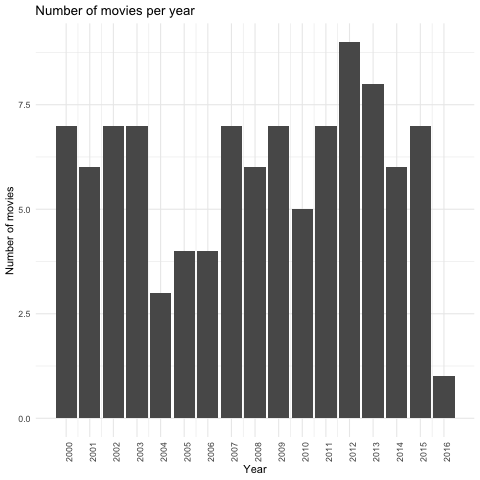

In [232]:
%%R -i df_joined

# plot the number of movies per year
df_joined %>%
  group_by(Year) %>%
  summarise(n = n()) %>%
  ggplot(aes(x = Year, y = n)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of movies per year",
       x = "Year",
       y = "Number of movies") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  # show each year on the x-axis
     scale_x_continuous(breaks = unique(df_joined$Year))
     
  

R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: 1: Removed 5 rows containing missing values (`geom_point()`). 

R[write to console]: 2: Removed 5 rows containing missing values (`geom_text()`). 



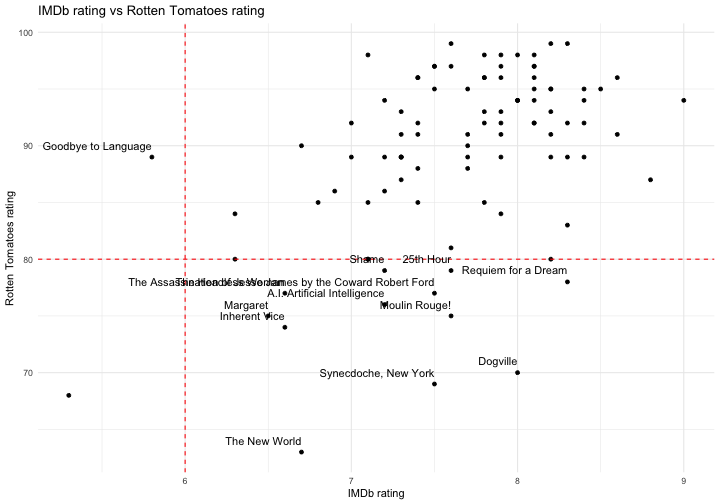

In [233]:
%%R -w 10 -h 7 -u in

# Plot a scatterplot, each dot is a moive, with "imdbRating" on the x-axis and "Rotten Tomatoes" on the y-axis
df_joined %>%
  ggplot(aes(x = `imdbRating`, y = `Rotten Tomatoes`)) +
  geom_point() +
  labs(title = "IMDb rating vs Rotten Tomatoes rating",
       x = "IMDb rating",
       y = "Rotten Tomatoes rating") +
  theme_minimal() +
  # mark the imdbRating < 6 and Rotten Tomatoes > 80
     geom_vline(xintercept = 6, linetype = "dashed", color = "red") +
     geom_hline(yintercept = 80, linetype = "dashed", color = "red") +
 # mark the movie names with either (the imdbRating < 6 AND Rotten Tomatoes > 80) or (the imdbRating > 6 AND Rotten Tomatoes < 80), do not use repel
  geom_text(aes(label = ifelse((`imdbRating` < 6 & `Rotten Tomatoes` > 80) | (`imdbRating` > 6 & `Rotten Tomatoes` < 80), Title, "")), vjust = -1, hjust = 1) +
  theme(legend.position = "none")
  
  

  #    geom_point(aes(color = ifelse((`imdbRating` < 6 & `Rotten Tomatoes` > 80) | (`imdbRating` > 6 & `Rotten Tomatoes` < 80), "red", "black"))) +
  # theme(legend.position = "none") 

R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: 1: Removed 2 rows containing missing values (`geom_point()`). 

R[write to console]: 2: Removed 2 rows containing missing values (`geom_text()`). 



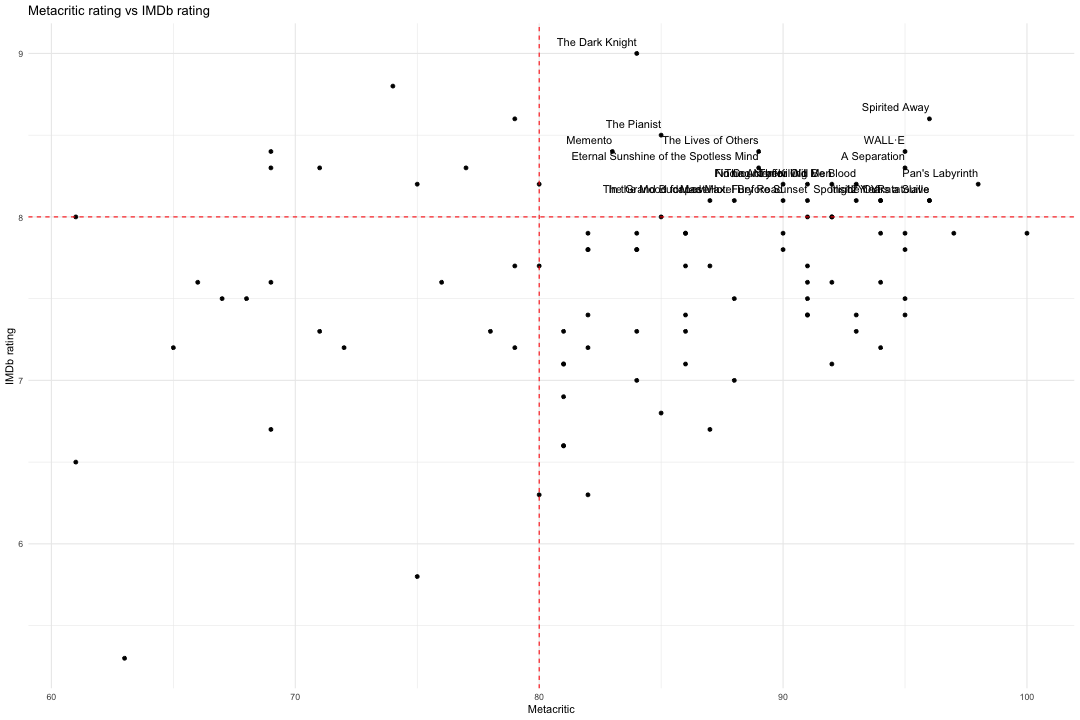

In [234]:
%%R  -w 15 -h 10 -u in

# plot Metacritic rating vs IMDb rating
df_joined %>%
  ggplot(aes(x = `Metacritic`, y = `imdbRating`)) +
  geom_point() +
  labs(title = "Metacritic rating vs IMDb rating",
       x = "Metacritic",
       y = "IMDb rating") +
  theme_minimal() +
  # mark the metacritic > 80 and imdbRating > 8
     geom_vline(xintercept = 80, linetype = "dashed", color = "red") +
     geom_hline(yintercept = 8, linetype = "dashed", color = "red") +
     # mark the movie names with the metacritic > 80 AND imdbRating > 8
     geom_text(aes(label = ifelse(`Metacritic` > 80 & `imdbRating` > 8, Title, "")), vjust = -1, hjust = 1) +
     theme(legend.position = "none")


R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 4 rows containing missing values (`position_stack()`). 



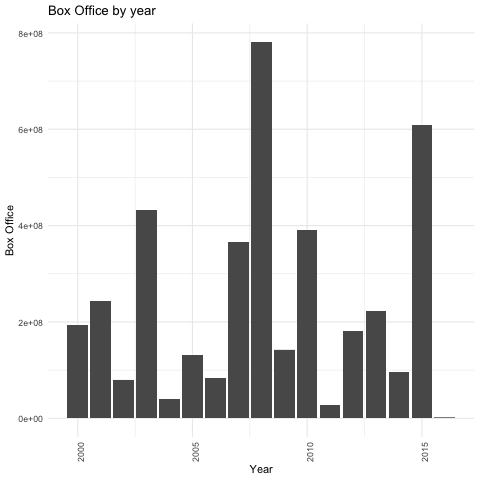

In [235]:
%%R

# plot Box Office grouped by Year with a historgram, each bar is the sum of the movie box office in that year
df_joined %>%
     ggplot(aes(x = Year, y = BoxOffice)) +
     geom_col() +
     labs(title = "Box Office by year",
           x = "Year",
           y = "Box Office") +
     theme_minimal() +
     theme(axis.text.x = element_text(angle = 90, hjust = 1))
     


R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 1 rows containing missing values (`geom_point()`). 



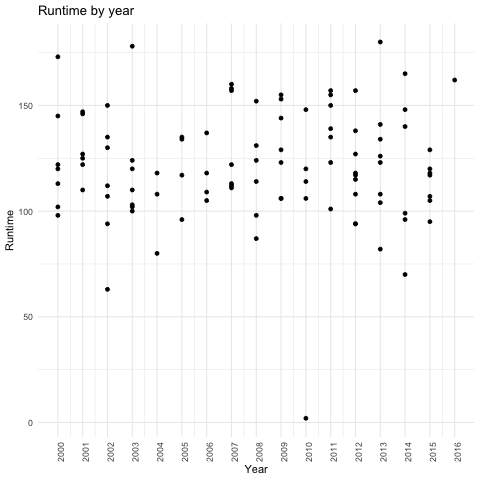

In [236]:
%%R
# Plot runtime with year in a scatterplot
df_joined %>%
  ggplot(aes(x = Year, y = Runtime)) +
  geom_point() +
  labs(title = "Runtime by year",
       x = "Year",
       y = "Runtime") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_continuous(breaks = unique(df_joined$Year))

R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 4 rows containing missing values (`position_stack()`). 



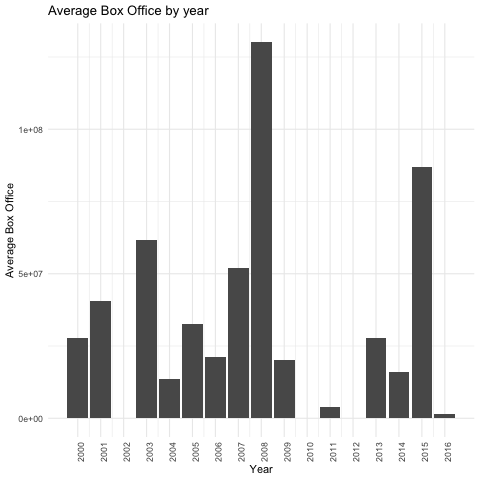

In [237]:
%%R

# plot average box office by year with a historgram
df_joined %>%
  group_by(Year) %>%
  summarise(avg_box_office = mean(BoxOffice)) %>%
  ggplot(aes(x = Year, y = avg_box_office)) +
  geom_col() +
  labs(title = "Average Box Office by year",
       x = "Year",
       y = "Average Box Office") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_x_continuous(breaks = unique(df_joined$Year))


R[write to console]: 此外: 
R[write to console]: 警告訊息：

R[write to console]: Removed 1 rows containing non-finite values (`stat_bin()`). 



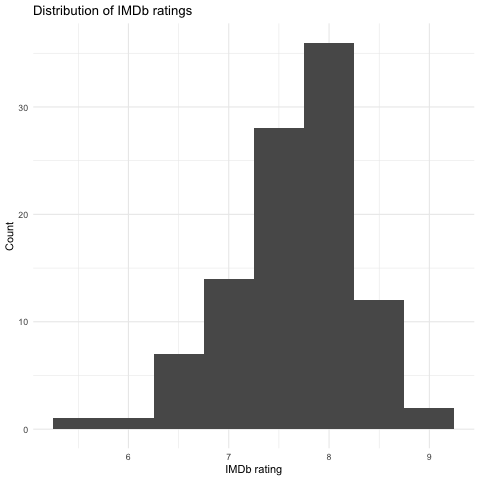

In [238]:
%%R
# plot the distribution of "Internet Movie Database" ratings
df_joined %>%
  ggplot(aes(x = `Internet Movie Database`)) +
  geom_histogram(binwidth = 0.5) +
  labs(title = "Distribution of IMDb ratings",
       x = "IMDb rating",
       y = "Count") +
  theme_minimal()

In [239]:
%%R


UsageError: %%R is a cell magic, but the cell body is empty. Did you mean the line magic %R (single %)?


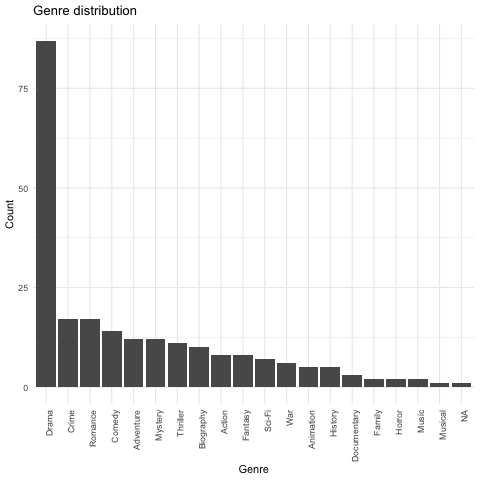

In [240]:
%%R

# plot genre distribution
df_joined %>%
  separate_rows(Genre, sep = ", ") %>%
  group_by(Genre) %>%
  summarise(n = n()) %>%
  ggplot(aes(x = reorder(Genre, -n), y = n)) +
  geom_col() +
  labs(title = "Genre distribution",
       x = "Genre",
       y = "Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

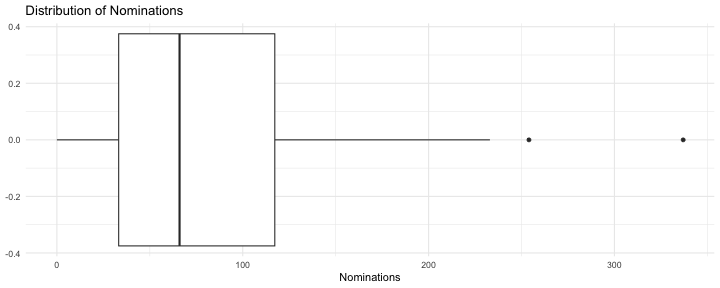

In [252]:
%%R -w 10 -h 4 -u in
# plot the distribution of "nomination" in box plot and show average, median, and mode
df_joined %>%
  ggplot(aes(x = Nominations)) +
  geom_boxplot() +
  labs(title = "Distribution of Nominations",
       x = "Nominations") +
  theme_minimal() 